In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"Datasets"

coe = np.genfromtxt(path + "\coe-results.csv", delimiter=",", skip_header = 1,
                    dtype = [("month", "U7"), 
                              ("bidding_no", "int64"), 
                              ("vehicle_class", "U100"),
                              ("quota", "int64"),
                              ("bids_success", "int64"),
                              ("bids_received", "int64"),
                              ("premium", "int64")])

license = np.genfromtxt(path + "\\total-number-of-persons-holding-qualified-driving-licence.csv", delimiter = ",", skip_header = 1,
                       dtype = [("year", "U4"),
                                ("qualified_driving_licence_holders", "int64")])

# travel = np.genfromtxt(path + "\\average-annual-kilometres-travelled-per-vehicle.csv",delimiter=",",  skip_header = 1,
#                        dtype = [("year", "U4"), 
#                               ("vehicle_type", "U100"),
#                               ("average_annual_mileage", "int64")])


hdb = np.genfromtxt(path + "\hdb-carpark-information.txt", delimiter = "\t", skip_header = 1,
                   dtype = [("car_park_no", "U5"),
                            ("address", "U100"),
                            ("x_coord", "float"),
                            ("y_coord", "float"),
                            ("car_park_type", "U100"),
                            ("type_of_parking_system", "U100"),
                            ("short_term_parking", "U100"),
                            ("free_parking", "U100"),
                            ("night_parking", "U100"),
                            ("car_park_decks", "int64"),
                            ("gantry_height", "float"),
                            ("car_park_basement", "U1")])

In [3]:
#Function to generate the data for 2 years by Category 
def Category(year):
    bid_A = []
    bid_B = []
    bid_C = []
    bid_D = []
    bid_E = []
    bid_rec_E = []
    for i in range(len(coe['month'])):
        if coe['month'][i].startswith(year) and coe['bidding_no'][i] == 1:
            if coe['vehicle_class'][i] == "Category A":
                bid_A.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category B":
                bid_B.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category C":
                bid_C.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category D":
                bid_D.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category E":
                bid_E.append(int(coe['premium'][i]))
                bid_rec_E.append(int(coe['bids_received'][i]))
    return [bid_A, bid_B, bid_C, bid_D, bid_E, bid_rec_E]

In [17]:
#Choosing the years to be visualised 

year = ["2015", "2016", "2017", "2018"]

# categories_1 = Category(year1)
# # print(categories_1)

# categories_2 = Category(year2)
# # print(categories_2)

# categories_3 = Category(year3)
# # print(categories_3)

# categories_4 = Category(year4)
# # print(categories_4)
categories = []
for i in range(4):
    categories.append(Category(year[i]))

In [31]:
print(categories[0][0])
print(categories[1][1])
print(categories[2][1])

[66010, 62002, 61410, 67749, 68589, 66000, 58700, 56209, 57089, 56001, 56001, 56989]
[54920, 38610, 47604, 47000, 51010, 56000, 56089, 57903, 57002, 53001, 56206, 46229]
[53106, 48209, 53300, 54405, 55414, 50110, 49802, 53711, 49000, 48109, 57414, 53711]


In [36]:
# Calculation of the difference for the respective years

#Year 2015
cata_diff_1 = []

for i in range(len(categories[0][0])):
    if i == len(categories[0][0])-1:
        break
    else:
        cata_diff_1.append(categories[0][0][i] - categories[0][0][i +1])


#Year 2016
cata_diff_2 = []

for i in range(len(categories[1][0])):
    if i == len(categories[1][0])-1:
        break
    else:
        cata_diff_2.append(categories[0][1][i] - categories[0][1][i +1])
    


#Year 3
cata_diff_3 = []

for i in range(len(categories[2][0])):
    if i == len(categories[2][0])-1:
        break
    else:
        cata_diff_3.append(categories[2][0][i] - categories[2][0][i +1])
    

#Year 4
cata_diff_4 = []

for i in range(len(categories[3][0])):
    if i == len(categories[3][0])-1:
        break
    else:
        cata_diff_4.append(categories[3][0][i] - categories[3][0][i +1])
    
cata_diff = [cata_diff_1, cata_diff_2, cata_diff_3, cata_diff_4]

In [38]:
print(cata_diff[0])

[4008, 592, -6339, -840, 2589, 7300, 2491, -880, 1088, 0, -988]


In [40]:
# Formatting of data in months

months = ["Jan-Feb", "Feb-Mar", "Mar-Apr", "Apr-May", "May-Jun", "Jun-Jul", "Jul-Aug", "Aug-Sep", "Sep-Oct", "Oct-Nov", "Nov-Dec"]

# Graph 1: Price Difference For Category A (1,600cc <) Every Month From 2015 to 2018

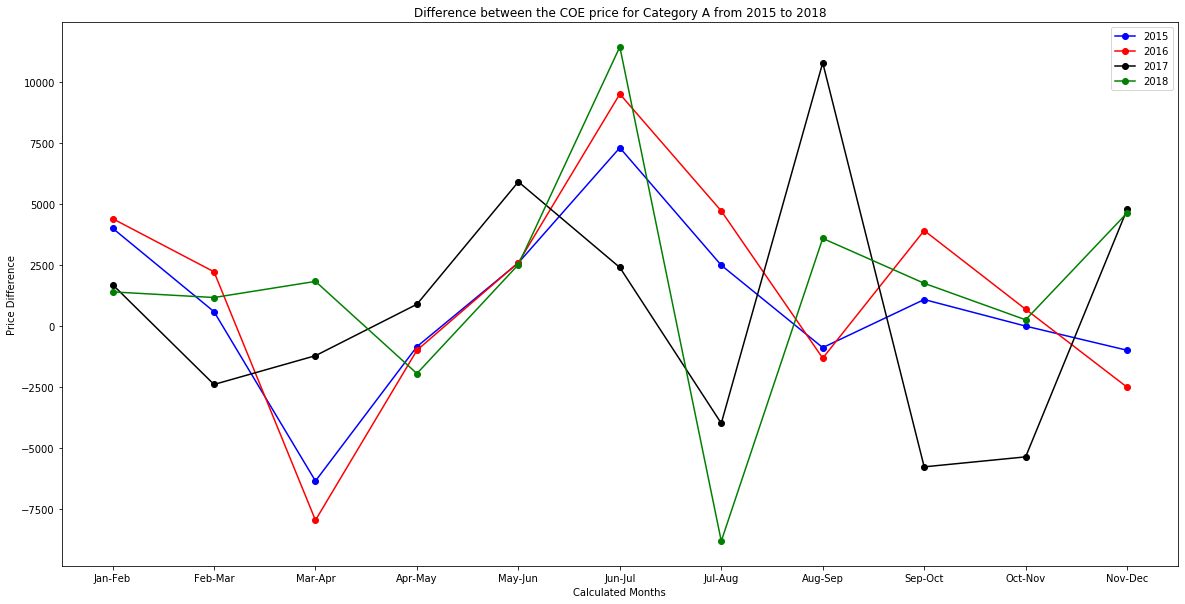

The average difference for 2015 is 820.09
The average difference for 2016 is 1389.82
The average difference for 2017 is 705.64
The average difference for 2018 is 1621.09


In [49]:
fig,ax = plt.subplots(figsize=(20,10))

ax.plot(months, cata_diff[0], 'bo-', label = year[0])
ax.plot(months, cata_diff[1], 'ro-', label = year[1])
ax.plot(months, cata_diff[2], 'ko-', label = year[2])
ax.plot(months, cata_diff[3], 'go-', label = year[3])

ax.set_title("Difference between the COE price for Category A from {} to {}".format(year[0], year[3]))
ax.set_xlabel('Calculated Months')
ax.set_ylabel('Price Difference')



plt.legend(loc='upper right')
plt.show()


def mean(value):
    return sum(value) / len(value)

for i in range(4):
    print("The average difference for {} is {:.2f}".format(year[i], mean(cata_diff[i])))

# Graph 2: The Price Range For Category B (1,600cc >) COE Over The Range Of 4 Years

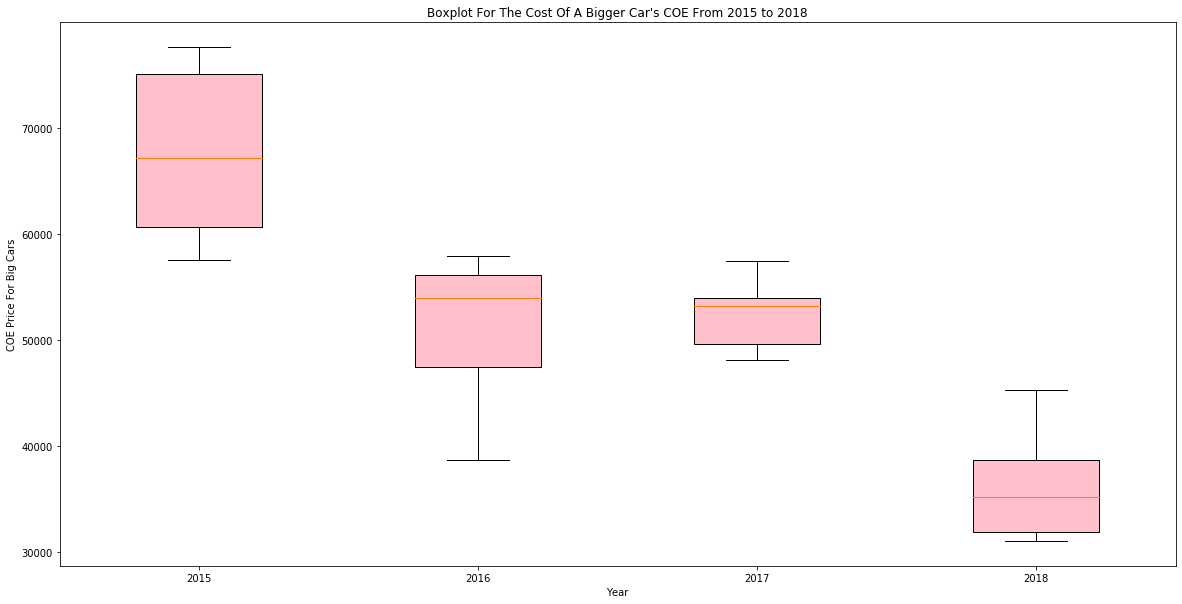

In 2015, the max is 77600.00, the min is 57501.00 and the mean is 67345.17

In 2016, the max is 57903.00, the min is 38610.00 and the mean is 51797.83

In 2017, the max is 57414.00, the min is 48109.00 and the mean is 52190.92

In 2018, the max is 45289.00, the min is 31000.00 and the mean is 35892.00


In [51]:
plt.figure(figsize=(20, 10))

data = [categories[0][1], categories[1][1], categories[2][1], categories[3][1]]
label = [year[0], year[1], year[2], year[3]]

bp = plt.boxplot(data ,labels = label ,patch_artist=True)

for patch in bp["boxes"]:
    patch.set(facecolor="pink")

    
plt.title("Boxplot For The Cost Of A Bigger Car's COE From 2015 to 2018")
plt.xlabel("Year")
plt.ylabel("COE Price For Big Cars")
plt.show()

print("In {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[0], max(categories[0][1]), min(categories[0][1]), mean(categories[0][1])))
print("\nIn {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[1], max(categories[1][1]), min(categories[1][1]), mean(categories[1][1])))
print("\nIn {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[2], max(categories[2][1]), min(categories[2][1]), mean(categories[2][1])))
print("\nIn {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[3], max(categories[3][1]), min(categories[3][1]), mean(categories[3][1])))


# Graph 3: The relation between the bids received and the COE price for Category D (Motorbikes)

In [55]:
Cat_D_Premium = categories[0][4] + categories[1][4] + categories[2][4] + categories[3][4]

Cat_D_Bids = categories[0][5] + categories[1][5] + categories[2][5] + categories[3][5]

print(len(Cat_D_Premium))
print(len(Cat_D_Bids))

48
48


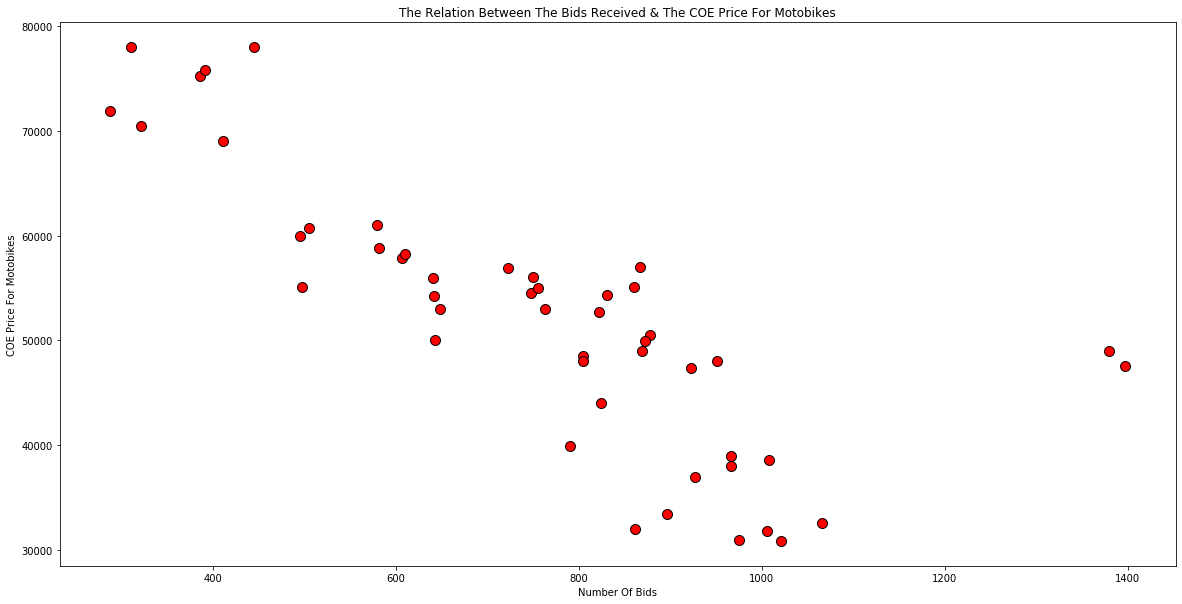

In [56]:
plt.figure(figsize=(20, 10))
x = []
plt.scatter(Cat_D_Bids,Cat_D_Premium, s = 100, color = "red", edgecolor = "black")

plt.title("The Relation Between The Bids Received & The COE Price For Motobikes")
plt.xlabel("Number Of Bids")
plt.ylabel("COE Price For Motobikes")
plt.show()

# Graph 4: The Number Of Driving Licences Over The Years

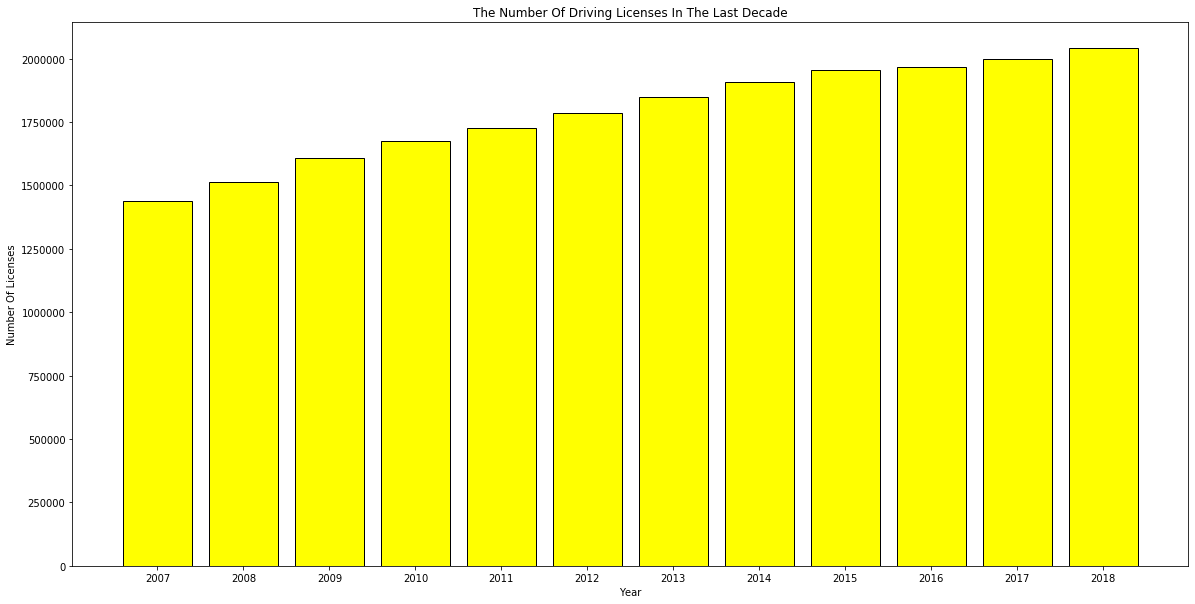

In [57]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(license['year'], license['qualified_driving_licence_holders'], color = "yellow", edgecolor = "black")

plt.title("The Number Of Driving Licenses In The Last Decade")
plt.xlabel("Year")
plt.ylabel("Number Of Licenses")
plt.show()

# Graph 5: The Number Of Decks In Singapore's HDB Carparks

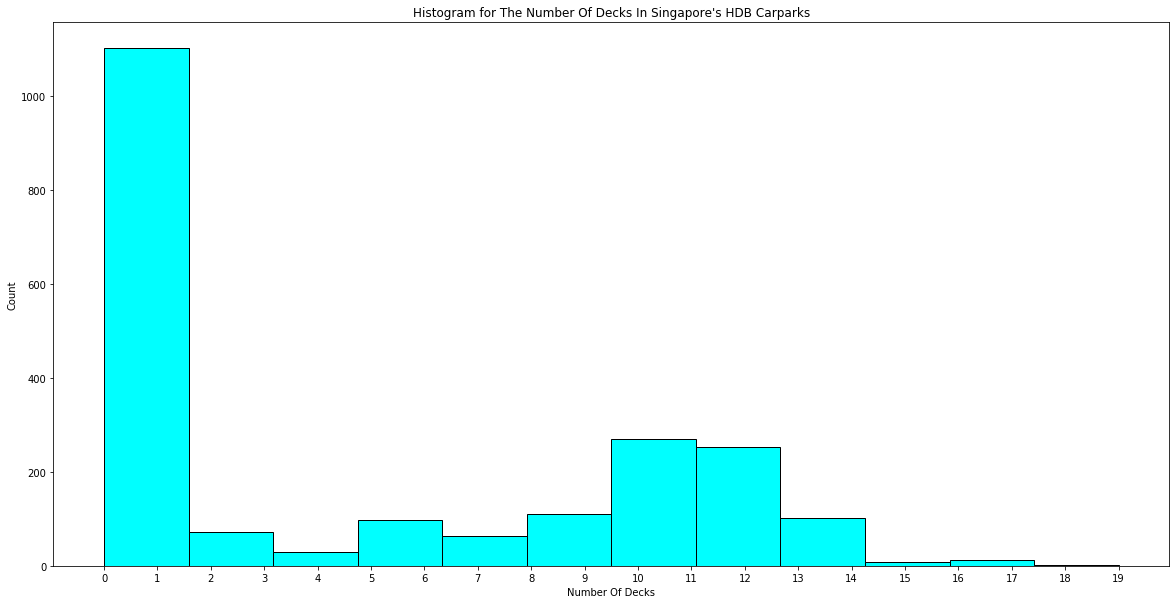

In [60]:
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(20))
plt.hist(hdb['car_park_decks'], bins = 12, color = "cyan", edgecolor = "black")
plt.title("Histogram for The Number Of Decks In Singapore's HDB Carparks")
plt.xlabel("Number Of Decks")
plt.ylabel("Count")
plt.show()